In [0]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 70kB/s 
     |████████████████████████████████| 450kB 39.3MB/s 
     |████████████████████████████████| 3.8MB 45.7MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
%matplotlib inline



In [0]:
df = pd.read_csv('Churn_Modelling.csv')

In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization


Using TensorFlow backend.


In [0]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
df.dropna(inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:

df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [0]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
encoder=LabelEncoder()
df["Geography"]=encoder.fit_transform(df["Geography"])
df["Gender"]=encoder.fit_transform(df["Gender"])

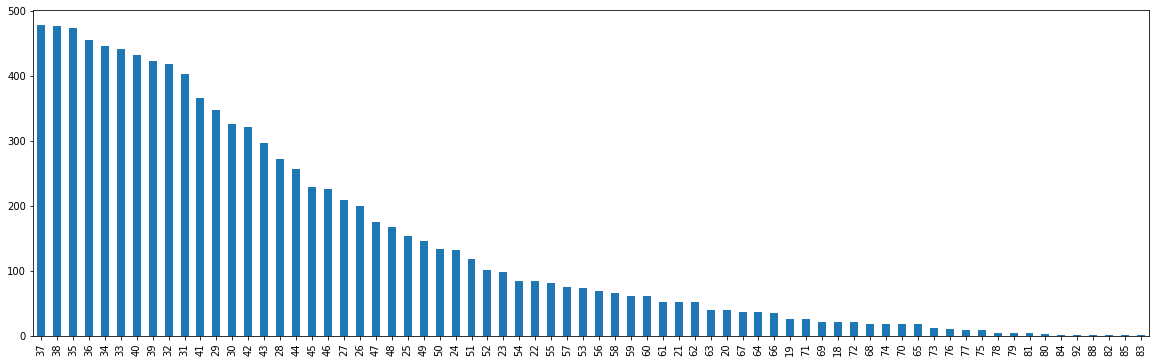

In [0]:
df["Age"].value_counts().plot.bar(figsize=(20,6))

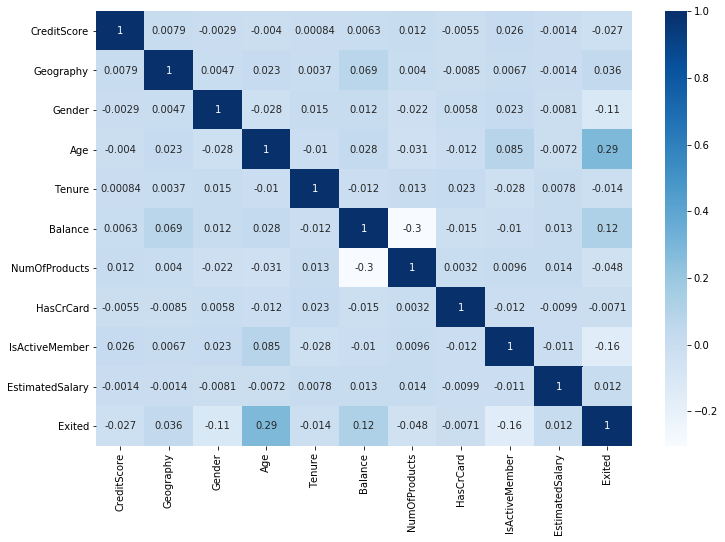

In [0]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

In [0]:
X=df.drop(["Exited"],axis=1)
y=df["Exited"]

In [0]:
y.shape

(10000,)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7500, 10)
(7500,)
(2500, 10)
(2500,)


In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [0]:
#X_train=np.array(X_train)
#X_test=np.array(X_test)
#y_train=np.array(y_train)
#y_test=np.array(y_test)

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Flatten
model = Sequential()
1
# Add an input layer 
model.add(Dense(30, activation='relu', input_shape=(10,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
epochs = 100
batch_size = 2000
from keras.utils import to_categorical

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)

loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)

Train on 6750 samples, validate on 750 samples
Epoch 1/100
6750/6750 [==============================] - 0s 25us/sample - loss: 2.3589 - accuracy: 0.3504 - val_loss: 1.7539 - val_accuracy: 0.7773
Epoch 2/100
6750/6750 [==============================] - 0s 7us/sample - loss: 1.4778 - accuracy: 0.8000 - val_loss: 1.1702 - val_accuracy: 0.7773
Epoch 3/100
6750/6750 [==============================] - 0s 7us/sample - loss: 0.9885 - accuracy: 0.8000 - val_loss: 0.8631 - val_accuracy: 0.7773
Epoch 4/100
6750/6750 [==============================] - 0s 7us/sample - loss: 0.7335 - accuracy: 0.8000 - val_loss: 0.6802 - val_accuracy: 0.7773
Epoch 5/100
6750/6750 [==============================] - 0s 6us/sample - loss: 0.5932 - accuracy: 0.8000 - val_loss: 0.5837 - val_accuracy: 0.7773
Epoch 6/100
6750/6750 [==============================] - 0s 7us/sample - loss: 0.5364 - accuracy: 0.8000 - val_loss: 0.5616 - val_accuracy: 0.7773
Epoch 7/100
6750/6750 [==============================] - 0s 7us/sample

In [0]:
import numpy as np
y_pred = np.round(model.predict(X_test))

In [0]:
print(y_pred[0])
print(y[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
